Imports

   price  maint doors riders trunkSize safety  class
0  vhigh  vhigh     2      2     small    low  unacc
1  vhigh  vhigh     2      2     small    med  unacc
2  vhigh  vhigh     2      2     small   high  unacc
3  vhigh  vhigh     2      2       med    low  unacc
4  vhigh  vhigh     2      2       med    med  unacc


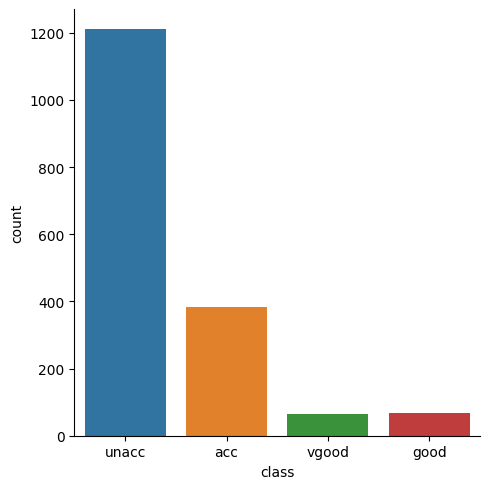

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from IPython.display import SVG
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
column_names = ['price', 'maint', 'doors', 'riders', 'trunkSize', 'safety', 'class']
df = pd.read_csv('data/car+evaluation/car.data', names=column_names)

print(df.head())
sns.catplot(
    data=df,
    x = 'class',
    kind="count",
)

Encoding ints to the different values


In [63]:
# Define mapping for categorical variables
price_map = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
maint_map = {'low': 1, 'med': 2, 'high': 4, 'vhigh': 4}
doors_map = {'2': 1, '3': 2, '4': 3, '5more': 4}
riders_map = {'2': 1, '4': 2, 'more': 3}  
trunk_map = {'small': 1, 'med': 2, 'big': 3}
safety_map = {'low': 1, 'med': 2, 'high': 3}
accept_map = {'unacc':0,'acc':1, 'good':1, 'vgood':1}

# Apply mapping to categorical variables
df['price'] = df['price'].map(price_map)
df['maint'] = df['maint'].map(maint_map)
df['doors'] = df['doors'].map(doors_map)
df['riders'] = df['riders'].map(riders_map)
df['trunkSize'] = df['trunkSize'].map(trunk_map)
df['safety'] = df['safety'].map(safety_map)
df['class'] = df['class'].map(accept_map)
df

,price,maint,doors,riders,trunkSize,safety,class
0,4,4,1,1,1,1,0
1,4,4,1,1,1,2,0
2,4,4,1,1,1,3,0
3,4,4,1,1,2,1,0
4,4,4,1,1,2,2,0
...,...,...,...,...,...,...,...
1723,1,1,4,3,2,2,1
1724,1,1,4,3,2,3,1
1725,1,1,4,3,3,1,0
1726,1,1,4,3,3,2,1


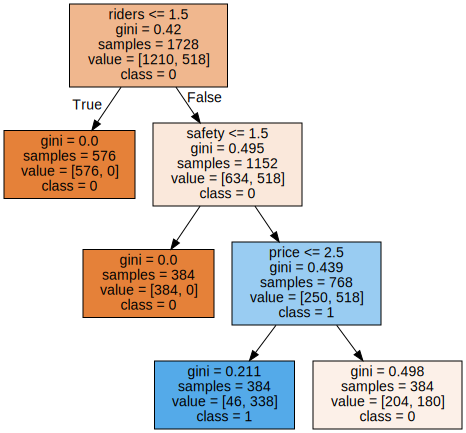

In [64]:
feature_cols = ['price', 'maint', 'doors', 'riders', 'trunkSize', 'safety']
X = df[feature_cols]
y = df["class"]
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                     class_names=['0', '1'], filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

Seems a little steep on safety and rider potential

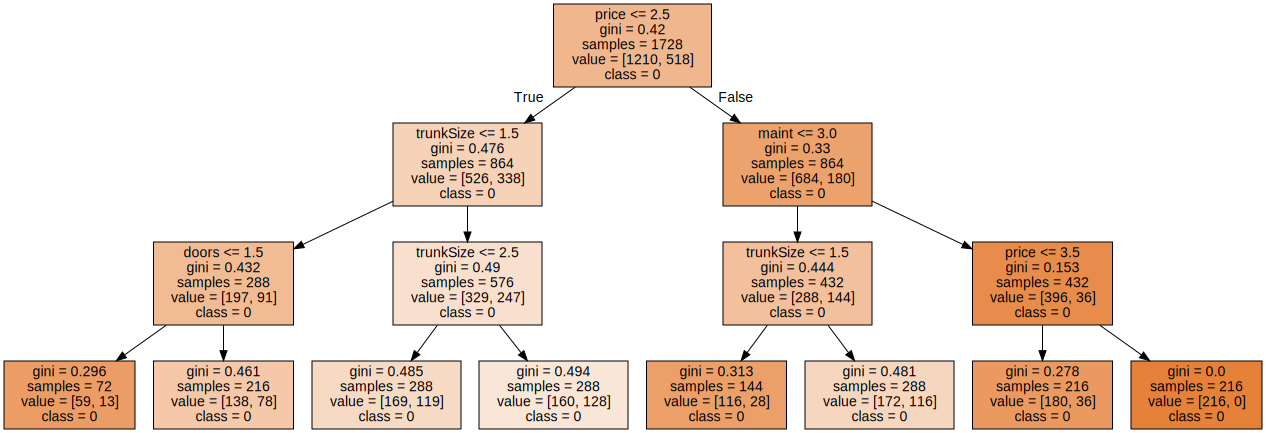

In [65]:
feature_cols = ['price', 'maint', 'doors', 'trunkSize']
X = df[feature_cols]
y = df["class"]
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                     class_names=['0', '1'], filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

Moral of the story, there is never a good car
Not true, lets give the model some more depth

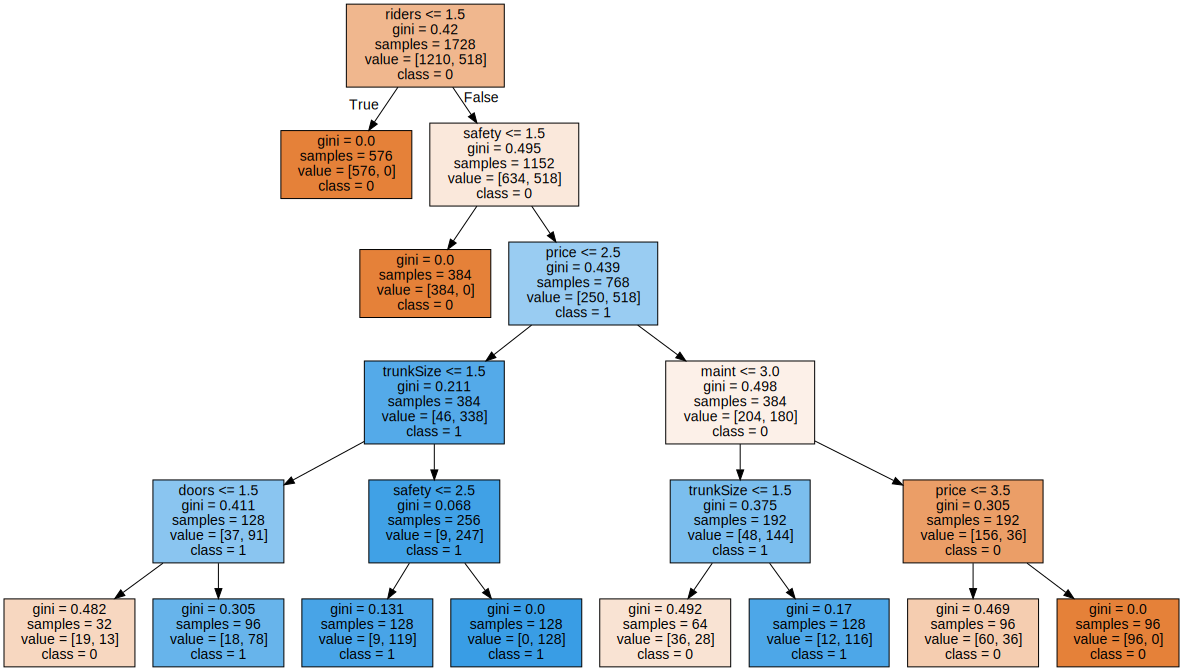

In [66]:
feature_cols = ['price', 'maint', 'doors', 'riders', 'trunkSize', 'safety']
X = df[feature_cols]
y = df["class"]
treeclf = DecisionTreeClassifier(max_depth=5, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                     class_names=['0', '1'], filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

Given everything that we have, the way the classification were made, it appears the assessors really don't find value in two seat cars or cars with low safety features. What does our decision tree look like if we throw those rows out

   price  maint  doors  riders  trunkSize  safety  class
0      4      4      1       1          1       1      0
1      4      4      1       1          1       2      0
2      4      4      1       1          1       3      0
3      4      4      1       1          2       1      0
4      4      4      1       1          2       2      0


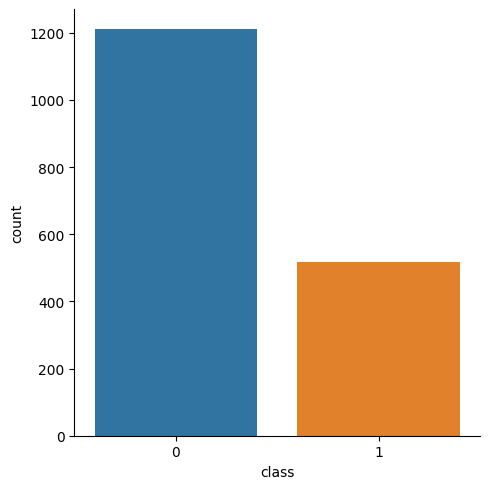

In [67]:
df2 = df[(df['riders'] != 1) & (df['safety'] != 1)]
print(df.head())
sns.catplot(
    data=df,
    x = 'class',
    kind="count",
)

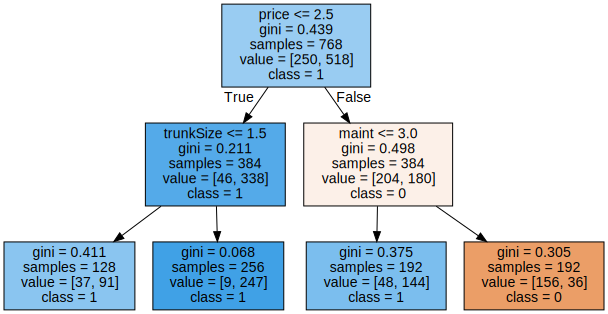

In [68]:
feature_cols = ['price', 'maint', 'doors', 'riders', 'trunkSize', 'safety']
X = df2[feature_cols]
y = df2["class"]
treeclf = DecisionTreeClassifier(max_depth=2, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                     class_names=['0', '1'], filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

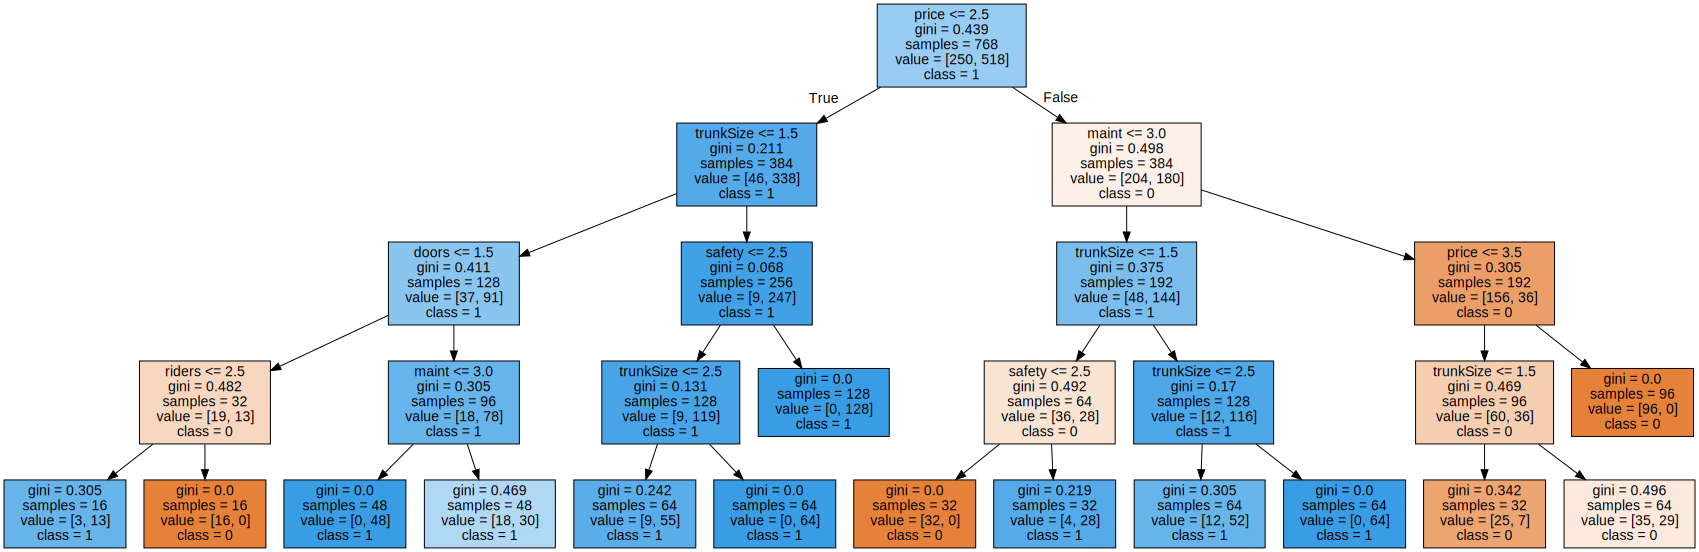

In [69]:
feature_cols = ['price', 'maint', 'doors', 'riders', 'trunkSize', 'safety']
X = df2[feature_cols]
y = df2["class"]
treeclf = DecisionTreeClassifier(max_depth=4, random_state=1)
treeclf.fit(X.values, y)

dot = tree.export_graphviz(treeclf, out_file=None,
                                    feature_names=feature_cols,
                                     class_names=['0', '1'], filled = True)
# display the graph here
graph = Source(dot)
svg = SVG(graph.pipe(format='svg'))
display(svg)

# Neural Network

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
from IPython.display import SVG
from graphviz import Source
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix

column_names = ['price', 'maint', 'doors', 'riders', 'trunkSize', 'safety', 'class']
df = pd.read_csv('data/car+evaluation/car.data', names=column_names)

In [71]:
# Define mapping for categorical variables
price_map = {'low': 1, 'med': 2, 'high': 3, 'vhigh': 4}
maint_map = {'low': 1, 'med': 2, 'high': 4, 'vhigh': 4}
doors_map = {'2': 1, '3': 2, '4': 3, '5more': 4}
riders_map = {'2': 1, '4': 2, 'more': 3}  
trunk_map = {'small': 1, 'med': 2, 'big': 3}
safety_map = {'low': 1, 'med': 2, 'high': 3}
accept_map = {'unacc':0,'acc':1, 'good':1, 'vgood':1}

# Apply mapping to categorical variables
df['price'] = df['price'].map(price_map)
df['maint'] = df['maint'].map(maint_map)
df['doors'] = df['doors'].map(doors_map)
df['riders'] = df['riders'].map(riders_map)
df['trunkSize'] = df['trunkSize'].map(trunk_map)
df['safety'] = df['safety'].map(safety_map)
df['class'] = df['class'].map(accept_map)
df

,price,maint,doors,riders,trunkSize,safety,class
0,4,4,1,1,1,1,0
1,4,4,1,1,1,2,0
2,4,4,1,1,1,3,0
3,4,4,1,1,2,1,0
4,4,4,1,1,2,2,0
...,...,...,...,...,...,...,...
1723,1,1,4,3,2,2,1
1724,1,1,4,3,2,3,1
1725,1,1,4,3,3,1,0
1726,1,1,4,3,3,2,1


In [72]:
X = df.drop('class',axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y)


In [73]:
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

X_train

array([[-1.36011972e+00,  9.72562121e-01,  1.33614000e+00,
        -1.24251852e+00, -1.22974125e+00, -9.47765973e-04],
       [-4.67153582e-01,  9.72562121e-01,  4.41699172e-01,
        -1.24251852e+00, -8.48097413e-03,  1.22735693e+00],
       [ 1.31877870e+00,  9.72562121e-01, -4.52741652e-01,
        -1.24251852e+00,  1.21277930e+00, -1.22925247e+00],
       ...,
       [-1.36011972e+00, -1.32891172e+00,  4.41699172e-01,
         1.19364487e+00,  1.21277930e+00, -1.22925247e+00],
       [-1.36011972e+00, -1.32891172e+00,  1.33614000e+00,
        -2.44368241e-02, -8.48097413e-03, -9.47765973e-04],
       [-1.36011972e+00,  9.72562121e-01,  4.41699172e-01,
         1.19364487e+00,  1.21277930e+00, -9.47765973e-04]])

In [81]:
# mlp = MLPClassifier(hidden_layer_sizes=(5),max_iter=500)
mlp = MLPClassifier(hidden_layer_sizes=(8, 10, 8, 6, 4),max_iter=50000)

In [82]:
mlp.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(8, 10, 8, 6, 4), max_iter=50000)

In [83]:
predictions = mlp.predict(X_test)

In [84]:
print(confusion_matrix(y_test,predictions))

[[299  11]
 [  8 114]]


In [85]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       310
           1       0.91      0.93      0.92       122

    accuracy                           0.96       432
   macro avg       0.94      0.95      0.95       432
weighted avg       0.96      0.96      0.96       432



In [86]:
print('This dataset has {} input nodes and {} output node(s)'.format(len(X.columns), len(y.unique())))
print('There are {} 2D arrays of coefficients, one for each layer'.format(len(mlp.coefs_)))
print('The layers have the following number of coefficients: {}')
for l in range(len(mlp.coefs_)):
    m = len(mlp.coefs_[l])
    n = len(mlp.coefs_[l][0])
    print('  {}: {}x{} ({} nodes feeding into a layer of {} nodes)'.format(l, m, n, m, n))
# Print the actual coefficients
# print(mlp.coefs_)

print()
print('There are {} 1D arrays of intercepts, one for each layer'.format(len(mlp.intercepts_)))
print('Each layer has {} intercepts, one for each node'.format([len(mlp.intercepts_[l]) for l,_ in enumerate(mlp.intercepts_)]))


This dataset has 6 input nodes and 2 output node(s)
There are 6 2D arrays of coefficients, one for each layer
The layers have the following number of coefficients: {}
  0: 6x8 (6 nodes feeding into a layer of 8 nodes)
  1: 8x10 (8 nodes feeding into a layer of 10 nodes)
  2: 10x8 (10 nodes feeding into a layer of 8 nodes)
  3: 8x6 (8 nodes feeding into a layer of 6 nodes)
  4: 6x4 (6 nodes feeding into a layer of 4 nodes)
  5: 4x1 (4 nodes feeding into a layer of 1 nodes)

There are 6 1D arrays of intercepts, one for each layer
Each layer has [8, 10, 8, 6, 4, 1] intercepts, one for each node


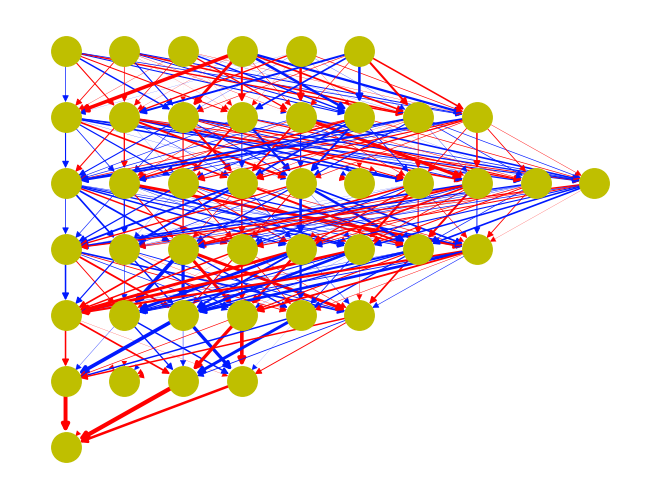

In [87]:
# you may need to install networkx with pip
import networkx as nx
import colorsys

def show_ann(mlp):
    hidden_layers_n = len(mlp.coefs_)-1
    layers_n = hidden_layers_n + 2
    input_neurons_n = len(mlp.coefs_[0])
    hidden_neurons_n = [len(mlp.coefs_[i+1]) for i in range(hidden_layers_n)]
    output_neurons_n = len(mlp.coefs_[-1][0])

    G = nx.DiGraph()
    pos = {}

    # Create the neurons of the input layer
    for i in range(input_neurons_n):
        pos['Layer0_{}'.format(i)] = (i,layers_n-1)

    for j in range(hidden_layers_n):
        # Create the neurons of the j'th hidden layer
        prev_layer = j
        cur_layer = j+1
        if (j == 0):
            prev_size = input_neurons_n
        else:
            prev_size = hidden_neurons_n[j-1]
        for i in range(hidden_neurons_n[j]):
            pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
            for k in range(prev_size):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    # Create the neurons of the output layer
    prev_layer = hidden_layers_n
    cur_layer = hidden_layers_n+1
    for i in range(output_neurons_n):
        pos['Layer{}_{}'.format(cur_layer,i)] = (i,layers_n-1-cur_layer)
        if len(hidden_neurons_n) > 0:
            for k in range(hidden_neurons_n[-1]):
                w = mlp.coefs_[prev_layer][k][i]
                G.add_edge('Layer{}_{}'.format(prev_layer,k),'Layer{}_{}'.format(cur_layer,i), weight=w)

    edges = G.edges()
    colors = [colorsys.hsv_to_rgb(0 if G[u][v]['weight'] < 0 else 0.65,
                                  1,#min(1, abs(G[u][v]['weight'])),
                                  1) for u,v in edges]
    weights = [abs(G[u][v]['weight'])*2 for u,v in edges]

    nx.draw(G, pos, node_color='y', node_size=450, width=weights, edge_color=colors)
    
show_ann(mlp)